## CRISPR gRNA library analysis
Tested on Python 3.9 on Ubuntu 20.10, but it should work on any OS with the following packages available to python:
* pandas:  1.2.0
* numpy:  1.19.4
* matplotlib:  3.3.3
* matplotlib_venn:  0.11.6
* scipy: 1.6.0

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
from scipy import stats

In [ ]:
# analyze growth experimentg
grna_cell = pd.read_csv("BsAb_Cell_1_0.01_Sidak_sgRNAList.txt", sep='\t')
grna_cas9 = pd.read_csv("BsAb_Cas9_1_0.01_Sidak_sgRNAList.txt", sep='\t')

grna = pd.merge(grna_cell, grna_cas9, on='sgRNA', suffixes=('_cell', '_cas9'))

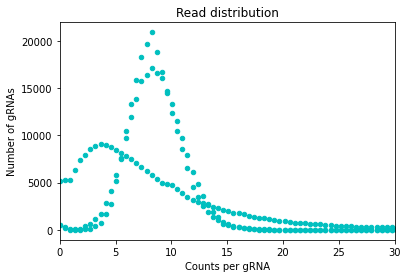

In [ ]:
# just using this to get histogram coordinates
ax = grna[['control mean_cell', 'counts_cell', 'counts_cas9']].plot(kind='hist', xlim=(0,30), bins=450, color=['black', 'lightcoral', 'forestgreen'])
# dont show that plot
plt.close();
# copy histogram data into a dataframe
df = pd.DataFrame([{'x': rect.get_x(), 'y': rect.get_height(), 'c': rect.get_facecolor()} for rect in ax.patches])
# make plot
f, ax = plt.subplots()
for i, g in df.groupby('c'):
    new_data = pd.DataFrame([{'x': (g.x.iloc[ind]+g.x.iloc[ind+1])/2, 'y':(g.y.iloc[ind]+g.y.iloc[ind+1])/2, 'c': i} for ind in range(len(g)-1)])
    nm = new_data.append(g).plot(ax=ax,kind='scatter', x='x', y='y', c='c', xlim=(0,30))
ax.set_xlabel("Counts per gRNA")
ax.set_ylabel("Number of gRNAs")
ax.set_title("Read distribution")
plt.savefig("Fig1c_gRNA.png", facecolor='white', dpi=300)

In [ ]:
grna_full = grna[grna.gene_cell.isin(grna.groupby('gene_cell')['sgRNA'].count()[grna.groupby('gene_cell')['sgRNA'].count()>4].index)]

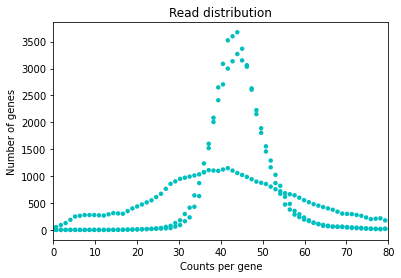

In [ ]:
ax = grna_full.groupby('gene_cell').sum()[['control mean_cell', 'counts_cell', 'counts_cas9']].plot(kind='hist', xlim=(0,80), bins=450, color=['black', 'lightcoral', 'forestgreen'])
plt.close()
df = pd.DataFrame([{'x': rect.get_x(), 'y': rect.get_height(), 'c': rect.get_facecolor()} for rect in ax.patches])
f, ax = plt.subplots()
for i, g in df.groupby('c'):
    new_data = pd.DataFrame([{'x': (g.x.iloc[ind]+g.x.iloc[ind+1])/2, 'y':(g.y.iloc[ind]+g.y.iloc[ind+1])/2, 'c': i} for ind in range(len(g)-1)])
    nm = new_data.append(g).plot(ax=ax,kind='scatter', x='x', y='y', c='c', xlim=(0,80), edgecolor='none')
ax.set_xlabel("Counts per gene")
ax.set_ylabel("Number of genes")
ax.set_title("Read distribution")
plt.savefig("Fig1c_gene.png", facecolor='white', dpi=300)